In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv(r'C:\Users\piyush\Machine Learning\Machine Learning Projects\Churn\customer_churn_data.csv')
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [5]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [6]:
df['InternetService'].unique()

array(['Fiber Optic', 'DSL', nan], dtype=object)

In [7]:
df['InternetService'].value_counts()

InternetService
Fiber Optic    395
DSL            308
Name: count, dtype: int64

In [8]:


# Assuming 'df' is your DataFrame
mode_value = df['InternetService'].mode()[0]  # Get the first mode if multiple modes exist
print(f"Mode value: {mode_value}")
df['InternetService'].fillna(mode_value, inplace=True) #inplace=true modifies the original dataframe
print(df.isnull().sum())

Mode value: Fiber Optic
CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64


C:\Users\piyush\AppData\Local\Temp\ipykernel_33964\176775711.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['InternetService'].fillna(mode_value, inplace=True) #inplace=true modifies the original dataframe


In [9]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,Fiber Optic,2208.32,No,Yes


<Axes: xlabel='Gender', ylabel='count'>

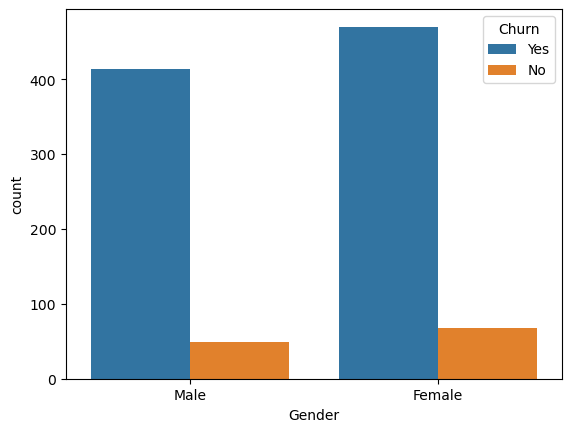

In [10]:
sns.countplot(data=df, x=df['Gender'], hue=df['Churn'])

<Axes: xlabel='ContractType', ylabel='count'>

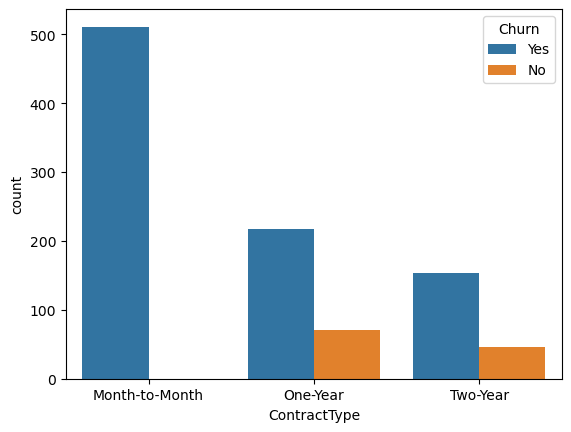

In [11]:
sns.countplot(data=df, x=df['ContractType'], hue=df['Churn'])

<Axes: xlabel='TechSupport', ylabel='count'>

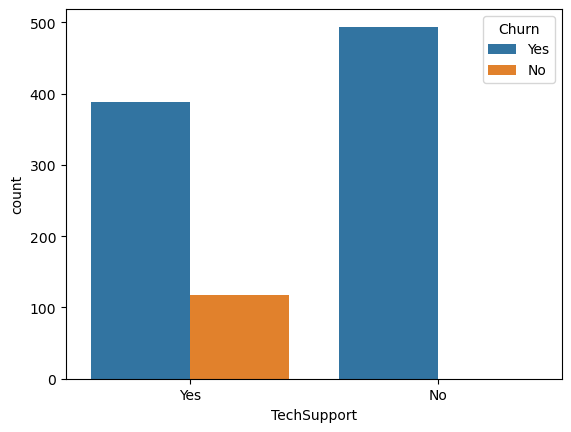

In [12]:
sns.countplot(data=df, x=df['TechSupport'], hue=df['Churn'])

In [13]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [14]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,Fiber Optic,2208.32,No,Yes


In [15]:
numeric_columns_data = df.select_dtypes(include=['number'])

In [16]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


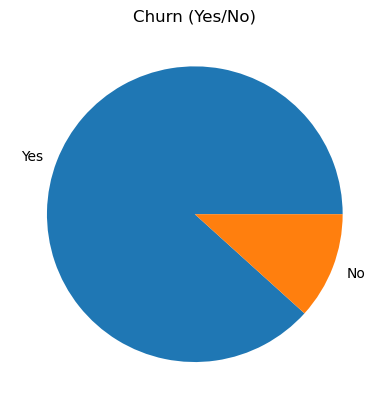

In [17]:
df['Churn'].value_counts().plot(kind='pie')
plt.title('Churn (Yes/No)')
plt.ylabel("")
plt.show()

In [18]:
df.groupby("Churn")['MonthlyCharges'].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [19]:
df.groupby(["Churn",'Gender'])['MonthlyCharges'].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [20]:
df.groupby("Churn")['Tenure'].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [21]:
df.groupby("Churn")['Age'].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

In [22]:
df.groupby('ContractType')['MonthlyCharges'].mean()

ContractType
Month-to-Month    75.909198
One-Year          73.822803
Two-Year          71.334500
Name: MonthlyCharges, dtype: float64

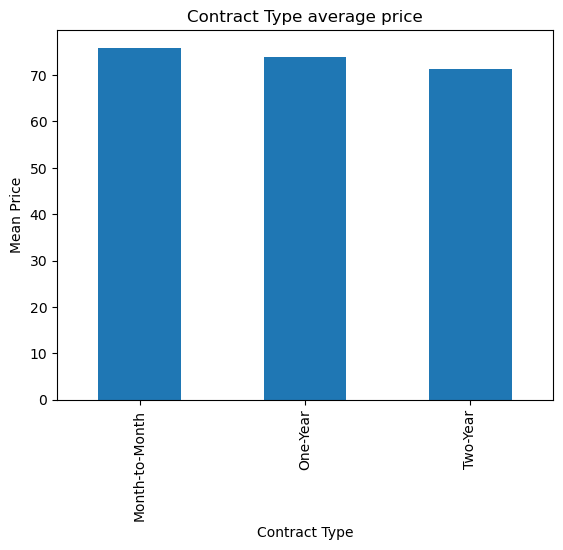

In [23]:
df.groupby('ContractType')['MonthlyCharges'].mean().plot(kind='bar')
plt.ylabel('Mean Price')
plt.xlabel('Contract Type')
plt.title('Contract Type average price')
plt.show()

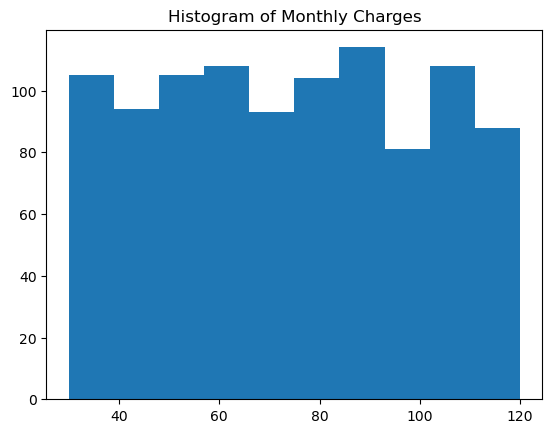

In [24]:
plt.hist(df['MonthlyCharges'])
plt.title('Histogram of Monthly Charges')
plt.show()

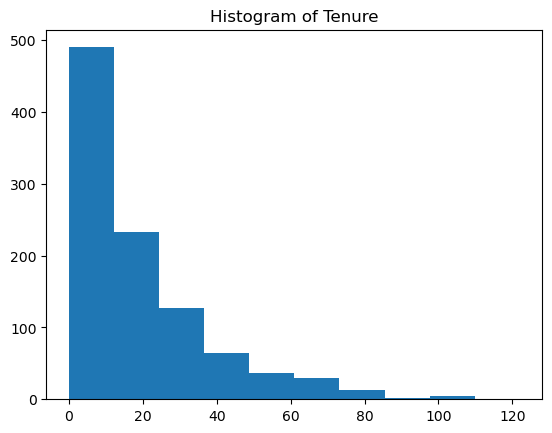

In [25]:
plt.hist(df['Tenure'])
plt.title('Histogram of Tenure')
plt.show()

In [26]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,Fiber Optic,2208.32,No,Yes


In [27]:
X = df.drop(['Churn'], axis='columns')
y = df['Churn']

In [28]:
X = X.drop(['CustomerID'], axis='columns')
X

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport
0,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes
1,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes
2,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No
3,60,Female,8,102.34,One-Year,DSL,818.72,Yes
4,42,Male,32,69.01,Month-to-Month,Fiber Optic,2208.32,No
...,...,...,...,...,...,...,...,...
995,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes
996,62,Male,9,80.93,Month-to-Month,Fiber Optic,728.37,No
997,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes
998,39,Male,68,65.67,One-Year,Fiber Optic,4465.56,No


In [29]:
X['Gender'] = X['Gender'].apply(lambda x:1 if x=='Female' else 0)

In [30]:
X['ContractType'].unique()

array(['Month-to-Month', 'One-Year', 'Two-Year'], dtype=object)

In [31]:
X['ContractType'].value_counts()

ContractType
Month-to-Month    511
One-Year          289
Two-Year          200
Name: count, dtype: int64

In [32]:
X['ContractType'] = X['ContractType'].apply(lambda x: 1 if x == 'Month-to-Month' else (2 if x == 'One-Year' else 0))

In [33]:
X['InternetService'].unique()

array(['Fiber Optic', 'DSL'], dtype=object)

In [34]:
X['InternetService'] = X['InternetService'].apply(lambda x:1 if x=='Fiber Optic' else 0)

In [35]:
X['TechSupport'] = X['TechSupport'].apply(lambda x:1 if x=='Yes' else 0)

In [36]:
X.head()

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport
0,49,0,4,88.35,1,1,353.40,1
1,43,0,0,36.67,1,1,0.00,1
2,51,1,2,63.79,1,1,127.58,0
3,60,1,8,102.34,2,0,818.72,1
4,42,0,32,69.01,1,1,2208.32,0


In [37]:
y.head()

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: Churn, dtype: object

In [38]:
y = y.apply(lambda x:1 if x=='Yes' else 0)

In [39]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

In [40]:
X.head()

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport
0,49,0,4,88.35,1,1,353.40,1
1,43,0,0,36.67,1,1,0.00,1
2,51,1,2,63.79,1,1,127.58,0
3,60,1,8,102.34,2,0,818.72,1
4,42,0,32,69.01,1,1,2208.32,0


In [41]:
X.drop(['TotalCharges'], axis='columns', inplace=True)
X.head()

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TechSupport
0,49,0,4,88.35,1,1,1
1,43,0,0,36.67,1,1,1
2,51,1,2,63.79,1,1,0
3,60,1,8,102.34,2,0,1
4,42,0,32,69.01,1,1,0


In [42]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [80]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [47]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print("Accuracy score on model is {}".format(accuracy_score(y_test, predictions)))

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
log_model = LogisticRegression()

In [51]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [52]:
y_pred = log_model.predict(X_test)

In [53]:
modelperformance(y_pred)

Accuracy score on model is 0.895


In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
param_grid = {
    'n_neighbors' : [3,5,7,9],
    'weights' : ['uniform', 'distance'],
}

In [56]:
kn = KNeighborsClassifier()

In [57]:
gridkn = GridSearchCV(kn, param_grid, cv=5)

In [58]:
gridkn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [59]:
gridkn.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [60]:
y_pred = gridkn.predict(X_test)

In [61]:
modelperformance(y_pred)

Accuracy score on model is 0.94


In [62]:
X.corr()

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TechSupport
Age,1.000000,0.047394,0.000472,0.006362,-0.025174,-0.027518,-0.097434
Gender,0.047394,1.000000,-0.015453,-0.027940,-0.083523,0.042161,0.027169
Tenure,0.000472,-0.015453,1.000000,-0.014552,0.015454,0.002831,-0.031601
MonthlyCharges,0.006362,-0.027940,-0.014552,1.000000,0.025081,0.057969,-0.017879
ContractType,-0.025174,-0.083523,0.015454,0.025081,1.000000,0.054377,-0.008749
InternetService,-0.027518,0.042161,0.002831,0.057969,0.054377,1.000000,-0.256273
TechSupport,-0.097434,0.027169,-0.031601,-0.017879,-0.008749,-0.256273,1.000000


In [63]:
from sklearn.svm import SVC

In [64]:
svm = SVC()

In [65]:
param_grid = {
    "C" : [0.01,0.1,0.5,1],
    'kernel' : ['linear', 'rbf', 'poly']
}

In [66]:
gridsvc = GridSearchCV(svm, param_grid, cv=5)

In [67]:
gridsvc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [68]:
gridsvc.best_params_

{'C': 1, 'kernel': 'poly'}

In [69]:
y_pred = gridsvc.predict(X_test)

In [70]:
modelperformance(y_pred)

Accuracy score on model is 0.96


In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

In [73]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [74]:
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [75]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'best'}

In [76]:
y_pred = grid_tree.predict(X_test)

In [77]:
modelperformance(y_pred)

Accuracy score on model is 1.0


In [78]:
best_model = grid_tree.best_estimator_

In [79]:
import pickle
    
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file, pickle.HIGHEST_PROTOCOL)

In [84]:
X.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges', 'ContractType',
       'InternetService', 'TechSupport'],
      dtype='object')

In [85]:
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Save as Excel file
X_test_df.to_excel("X_test_churn.xlsx", index=False)